In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_csv("books.csv")
df.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


Hacemos una copia de nuestro df para utilizarlo en algunos ejercicios.

In [3]:
df_copia = df.copy()

# Ejercicio 1

- Tablas de contigencia

In [4]:
min = df["User Rating"].describe()[3]
min

3.3

In [5]:
max = df["User Rating"].describe()[6]
max

4.8

Obtengo el valor mín y max de mi columna para saber el rango en el que varía los datos y así calcular los diferentes intervalos de datos (bins)

In [6]:
bins = np.arange(min-0.5,max+1, 0.50)
bins

array([2.8, 3.3, 3.8, 4.3, 4.8, 5.3])

In [7]:
df_copia["User_rating_group"] = pd.cut(df["User Rating"], bins = bins)
df_copia.sample(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre,User_rating_group
490,The Wonky Donkey,Craig Smith,4.8,30183,4,2018,Fiction,"(4.3, 4.8]"
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction,"(4.3, 4.8]"


Hemos creado una columna nueva *'User_rating_group'* asignando a nuestra columna *'User rating'* un intervalo u otro dependiendo de su valor (bins). Observamos cuántos registros se han clasificado en cada uno de los intervalos. Por simple curiosidad.

In [8]:
df_copia["User_rating_group"].value_counts()

(4.3, 4.8]    438
(3.8, 4.3]     56
(4.8, 5.3]     52
(3.3, 3.8]      3
(2.8, 3.3]      1
Name: User_rating_group, dtype: int64

Creamos la tabla de contingencia

In [9]:
contig_num= pd.crosstab(df_copia["User_rating_group"], df_copia["Genre"], margins =True )
contig_num

Genre,Fiction,Non Fiction,All
User_rating_group,,,
"(2.8, 3.3]",1,0,1
"(3.3, 3.8]",3,0,3
"(3.8, 4.3]",26,30,56
"(4.3, 4.8]",169,269,438
"(4.8, 5.3]",41,11,52
All,240,310,550


Hemos hecho nuestra tabla de contigencia con una variable numérica y una categórica. 
Observamos que los libros del género **Non Fiction** tiene una frecuencia mayor en altas valoraciones (ratings) de l@s usuria@s.

También vemos que la frecuencia de valoraciones media-altas (de 4.3 a 4.8) es muy superior tanto para el género **Fiction** como **Non Fiction** respecto a las de valores bajas o medias-bajas (2.8, 3.3 hasta 3.8, 4.3 ). Esto tiene sentido porque nuestros datos son los libros más vendidos (mejor valorados -> más se venden)

# Bonus

In [10]:
############# Estoy probando a hacer cosas extra (o bonus) para que quede todo más profesional :) No sé si saldrá, lo dejo indicado.
########### añade tantos por cientos a la tabla de contigencia. Cçomo? Apply

In [11]:
contig_num["All"]

User_rating_group
(2.8, 3.3]      1
(3.3, 3.8]      3
(3.8, 4.3]     56
(4.3, 4.8]    438
(4.8, 5.3]     52
All           550
Name: All, dtype: int64

In [12]:
# total  550     100
#        1         x 

# 1*100 / 550

In [13]:
contig_num["All_prueba"] = contig_num["All"].copy()

In [14]:
def percentage(col):
    for i in range(len(col)):
        print(i)

        perc = (col[i] * 100) / col[len(col)-1]
        
        return perc
percentage(contig_num["All_prueba"])

0


0.18181818181818182

In [15]:
contig_num["All_prueba"] = contig_num["All"].apply(lambda x: x/x.sum())

AttributeError: 'int' object has no attribute 'sum'

# Se acaba Bonus

In [16]:
contig = pd.crosstab(df["Genre"], df["Author"])
contig

Author,Abraham Verghese,Adam Gasiewski,Adam Mansbach,Adir Levy,Admiral William H. McRaven,Adult Coloring Book Designs,Alan Moore,Alex Michaelides,Alice Schertle,Allie Brosh,...,Todd Burpo,Tony Hsieh,Tucker Carlson,Veronica Roth,W. Cleon Skousen,Walter Isaacson,William Davis,William P. Young,Wizards RPG Team,Zhi Gang Sha
Genre,,,,,,,,,,,,,,,,,,,,,
Fiction,2,0,1,1,0,0,1,1,1,0,...,0,0,0,4,0,0,0,2,3,0
Non Fiction,0,1,0,0,1,1,0,0,0,1,...,2,1,1,0,1,3,2,0,0,2


Hemos intentando crear una tabla de contigencia con dos variables categóricas de nuestro df pero observamos que en principio no podemos sacar conclusiones debido a la naturaleza de nuestros datos.

# Coeficiente de correlación

- Coeficiente de correlación de Pearson de nuestras variables numéricas

In [17]:
df_copia.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,User_rating_group
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,"(4.3, 4.8]"
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,"(4.3, 4.8]"
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,"(4.3, 4.8]"
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,"(4.3, 4.8]"
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,"(4.3, 4.8]"


In [18]:
df_numericas = df.select_dtypes(exclude = "object")
df_numericas

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018
3,4.7,21424,6,2017
4,4.8,7665,12,2019
...,...,...,...,...
545,4.9,9413,8,2019
546,4.7,14331,8,2016
547,4.7,14331,8,2017
548,4.7,14331,8,2018


In [19]:
del df_numericas["Year"]

In [20]:
df_numericas

,User Rating,Reviews,Price
0,4.7,17350,8
1,4.6,2052,22
2,4.7,18979,15
3,4.7,21424,6
4,4.8,7665,12
...,...,...,...
545,4.9,9413,8
546,4.7,14331,8
547,4.7,14331,8
548,4.7,14331,8


In [ ]:
###################### DUDA EXISTENCIAL: year debería ser categórica?
############ He cambiado la columna a categórica porque no tiene sentido en dejarla numérica en este caso.

In [21]:
df_numericas.dtypes

User Rating    float64
Reviews          int64
Price            int64
dtype: object

In [22]:
cor2 = np.corrcoef(df_numericas)
cor2

array([[1.        , 0.99997389, 0.99999995, ..., 1.        , 1.        ,
        1.        ],
       [0.99997389, 1.        , 0.99997605, ..., 0.99997414, 0.99997414,
        0.99997414],
       [0.99999995, 0.99997605, 1.        , ..., 0.99999996, 0.99999996,
        0.99999996],
       ...,
       [1.        , 0.99997414, 0.99999996, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99997414, 0.99999996, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99997414, 0.99999996, ..., 1.        , 1.        ,
        1.        ]])

In [23]:
cor = np.corrcoef(df["User Rating"],df["Price"])
cor

array([[ 1.        , -0.13308629],
       [-0.13308629,  1.        ]])

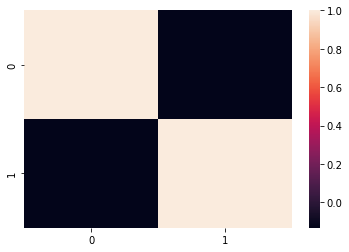

In [24]:
fig = sns.heatmap(data = (cor))

Observamos que no existe correlación entre las variables `Price`y `User Ratings`ya que el valor del coeficiente de correlación es muy próximo a 0.

# Sesgo

- Sesgos de alguna variable numérica

In [25]:
df.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


In [26]:
media = np.mean(df["Price"])
media

13.1

In [27]:
std = np.std(df["Price"])
std

10.83240089227266

In [28]:
sesgo = skew(df["Price"])
sesgo
# intentamos dibujar la media y la desviación típica como una línea en nuestro gráfico de barrras ¿varianza, no sé cuál sería más adecuado) en el histograma 

3.674998760184651

Como nuestro valor del sesgo es positivo, deducimos que nuestros valores de Price están sesgado de forma positiva, a la izquierda. 

In [29]:
x1 = media
x2 = std

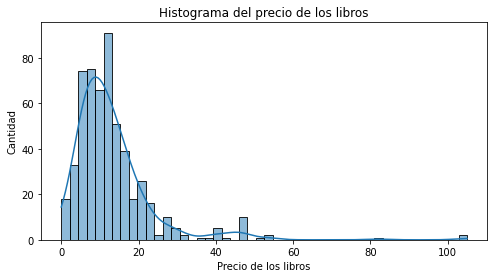

In [30]:
plt.figure(figsize =(8,4))
fig = sns.histplot(x=df["Price"], kde = True)
fig.set(xlabel='Precio de los libros', ylabel = 'Cantidad')
fig.set_title('Histograma del precio de los libros')
plt.show()

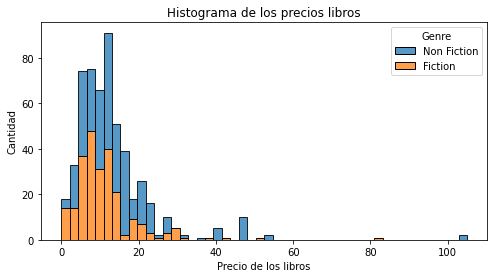

In [31]:
plt.figure(figsize =(8,4))
fig = sns.histplot(x=df["Price"],  data = df, hue ="Genre",multiple = "stack")
fig.set(xlabel='Precio de los libros', ylabel = 'Cantidad')
fig.set_title('Histograma de los precios libros')
plt.show()

Como observamos en el histograma, confirmamos que los valores de nuestros precios están sesgados a la izquierda. Así, se soportan nuestras conclusiones del sesgo y de la media de que están sesgados positivamente, hacia la izquierda.

- Para entender un poco mejor nuestros datos, nos preguntamos si existe relación entre el precio del libro y su valoración por los usuarios.

In [32]:
r2_price_ratings = np.corrcoef(df["Price"], df["User Rating"])
r2_price_ratings

array([[ 1.        , -0.13308629],
       [-0.13308629,  1.        ]])

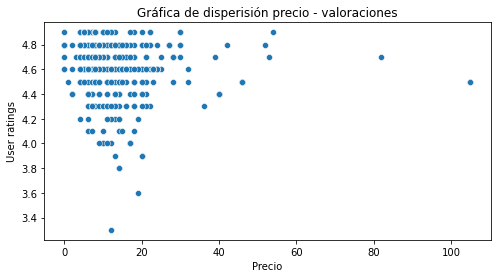

In [33]:
plt.figure(figsize =(8,4))
fig = sns.scatterplot(x=df["Price"], y=df["User Rating"], data = df)
fig.set(xlabel='Precio', ylabel = 'User ratings')
fig.set_title('Gráfica de disperisión precio - valoraciones')
plt.show()

Vemos que no hay relación entre el precio de los libros y su valoración, esto es, podemos encontrar libros muy bien valorados con precios altos y bajos sin ningún tipo de 'patrón'. Podemos ver esta 'no relación' númericamente en el array del coeficiente de correlación que nos da el valor (-0.133) y gráficamente porque no encontramos un patrón definido.

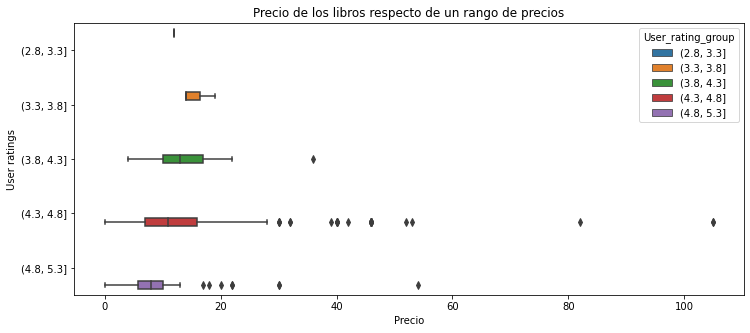

In [34]:
# Boxplot por vertical, por isla
plt.figure(figsize =(12,5))
fig = sns.boxplot(x= df_copia["Price"], y = df_copia["User_rating_group"], data = df_copia, hue = "User_rating_group")
fig.set(xlabel='Precio', ylabel= 'User ratings' )
fig.set_title('Precio de los libros respecto de un rango de precios')
plt.show()


In [35]:
df_copia.dtypes

Name                   object
Author                 object
User Rating           float64
Reviews                 int64
Price                   int64
Year                    int64
Genre                  object
User_rating_group    category
dtype: object

Nos preguntamos cuántos libros se han publicado cada año respecto a su género

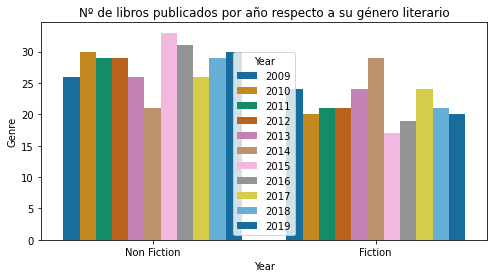

In [36]:
plt.figure(figsize =(8,4))
fig = sns.countplot(x= df_copia["Genre"],data = df_copia, hue = "Year", palette ="colorblind")
fig.set(xlabel='Year', ylabel= 'Genre')
fig.set_title('Nº de libros publicados por año respecto a su género literario')
plt.show()

En la gráfica podemos comparar cuántos libros del género Non Fiction y Fiction se han publicado en diferentes años. Vemos grandes diferencias en los años 2015, 2016 y 2018.

# Intervalo de confianza

In [37]:
df_numericas

,User Rating,Reviews,Price
0,4.7,17350,8
1,4.6,2052,22
2,4.7,18979,15
3,4.7,21424,6
4,4.8,7665,12
...,...,...,...
545,4.9,9413,8
546,4.7,14331,8
547,4.7,14331,8
548,4.7,14331,8


In [38]:
df_numericas["User Rating"]

0      4.7
1      4.6
2      4.7
3      4.7
4      4.8
      ... 
545    4.9
546    4.7
547    4.7
548    4.7
549    4.7
Name: User Rating, Length: 550, dtype: float64

In [39]:
data = df_numericas["User Rating"]

In [41]:
pd.options.display.float_format = '{:.2f}'.format
intervalos = st.t.interval(alpha = 0.95, df = len(data)-1, loc= np.mean(data),scale=st.sem(data))
print(intervalos)

#Lo comparamos con la media
print(np.mean(data))

(4.5993522611600755, 4.637375011567207)
4.618363636363641


Observamos cual es el intervalo de confianza con un 95%. Y efectivamente si calculamos la media, esta se encuentra entre los dos valores dados. 

Tendremos en cuenta que el nivel de confianza y la amplitud del intervalo variarán conjuntamente. Es decir, un intervalo de valores más amplio tendrá más probabilidad de cumplirse (mayor nivel de confianza), mientras que un intervalo más pequeño, que ofrece una estimación más precisa, tendrá una probabilidad de error también más elevada

- Nos preguntamos cuántos libros se han publicado cada año respecto a su género

Para ello, organizamos nuestros datos por nombre/fecha.

In [42]:
frecuentes= df["Name"].value_counts()[0:50]
frecuentes

Publication Manual of the American Psychological Association, 6th Edition                             10
StrengthsFinder 2.0                                                                                    9
Oh, the Places You'll Go!                                                                              8
The Very Hungry Caterpillar                                                                            7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change                           7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)                      6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)                              6
The Official SAT Study Guide                                                                           5
To Kill a Mockingbird                                                                                  5
The 5 Love Languages: The Secret to Love That Lasts    

In [43]:
values = frecuentes.keys().to_list()
values

['Publication Manual of the American Psychological Association, 6th Edition',
 'StrengthsFinder 2.0',
 "Oh, the Places You'll Go!",
 'The Very Hungry Caterpillar',
 'The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change',
 'The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)',
 'Jesus Calling: Enjoying Peace in His Presence (with Scripture References)',
 'The Official SAT Study Guide',
 'To Kill a Mockingbird',
 'The 5 Love Languages: The Secret to Love That Lasts',
 'The 5 Love Languages: The Secret to Love that Lasts',
 'Laugh-Out-Loud Jokes for Kids',
 'How to Win Friends & Influence People',
 'Unbroken: A World War II Story of Survival, Resilience, and Redemption',
 'The Five Dysfunctions of a Team: A Leadership Fable',
 "Giraffes Can't Dance",
 'Wonder',
 'First 100 Words',
 'The Fault in Our Stars',
 'Dear Zoo: A Lift-the-Flap Book',
 'The Wonderful Things You Will Be',
 'The Life-Changing Magic of Tidying Up: The Japanese Art 

In [44]:
df_name = df[df["Name"].isin(values)]
df_name

,Name,Author,User Rating,Reviews,Price,Year,Genre
46,Catching Fire (The Hunger Games),Suzanne Collins,4.70,22614,11,2010,Fiction
47,Catching Fire (The Hunger Games),Suzanne Collins,4.70,22614,11,2011,Fiction
48,Catching Fire (The Hunger Games),Suzanne Collins,4.70,22614,11,2012,Fiction
50,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.70,1542,14,2009,Non Fiction
51,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.70,1542,14,2010,Non Fiction
...,...,...,...,...,...,...,...
544,Wonder,R. J. Palacio,4.80,21625,9,2017,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.70,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.70,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.70,14331,8,2018,Non Fiction


- ¿Cuántas veces ha aparecido cada libro en la lista de más vendidos al año?

In [58]:
name_ordenado = df["Name"].value_counts()
df_name_ordenado = name_ordenado.reset_index()
df_name_ordenado

,index,Name
0,Publication Manual of the American Psychologic...,10
1,StrengthsFinder 2.0,9
2,"Oh, the Places You'll Go!",8
3,The Very Hungry Caterpillar,7
4,The 7 Habits of Highly Effective People: Power...,7
...,...,...
346,Humans of New York : Stories,1
347,Howard Stern Comes Again,1
348,Homebody: A Guide to Creating Spaces You Never...,1
349,Have a Little Faith: A True Story,1


In [59]:
df_name_ordenado = df_name_ordenado.rename(columns={'index':'name', 'Name':'cantidad'})
df_name_ordenado

,name,cantidad
0,Publication Manual of the American Psychologic...,10
1,StrengthsFinder 2.0,9
2,"Oh, the Places You'll Go!",8
3,The Very Hungry Caterpillar,7
4,The 7 Habits of Highly Effective People: Power...,7
...,...,...
346,Humans of New York : Stories,1
347,Howard Stern Comes Again,1
348,Homebody: A Guide to Creating Spaces You Never...,1
349,Have a Little Faith: A True Story,1


<BarContainer object of 351 artists>

/home/adalaber/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/adalaber/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


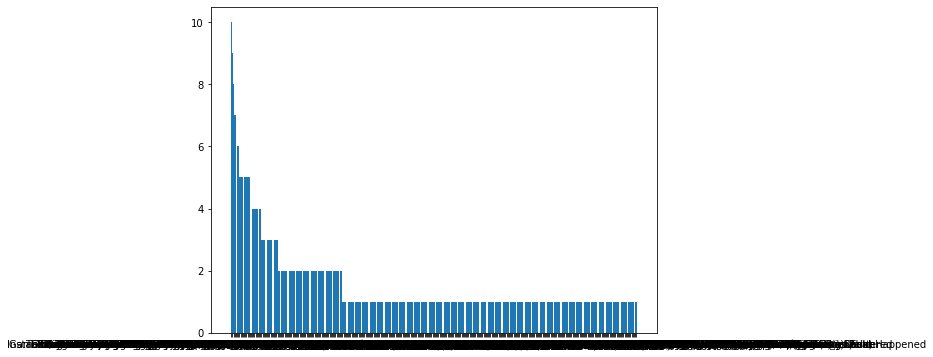

In [60]:
plt.figure(figsize=(8,6))
plt.bar(df_name_ordenado['name'], df_name_ordenado["cantidad"])

In [45]:
################## No consigo mostrar en una gráfica muuuy simplee este df que muestra cuántas veces ha aparecido cada libro en las listas
name_ordenado = df["Name"].value_counts()
df_name_ordenado = pd.DataFrame(name_ordenado, columns = ["Name"])
df_name_ordenado.head(5)

,Name
"Publication Manual of the American Psychological Association, 6th Edition",10
StrengthsFinder 2.0,9
"Oh, the Places You'll Go!",8
The Very Hungry Caterpillar,7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change,7


Aquí podemos observar en qué año ha aparecido cada uno de los libros en la lista de más vendidos de Amazon.

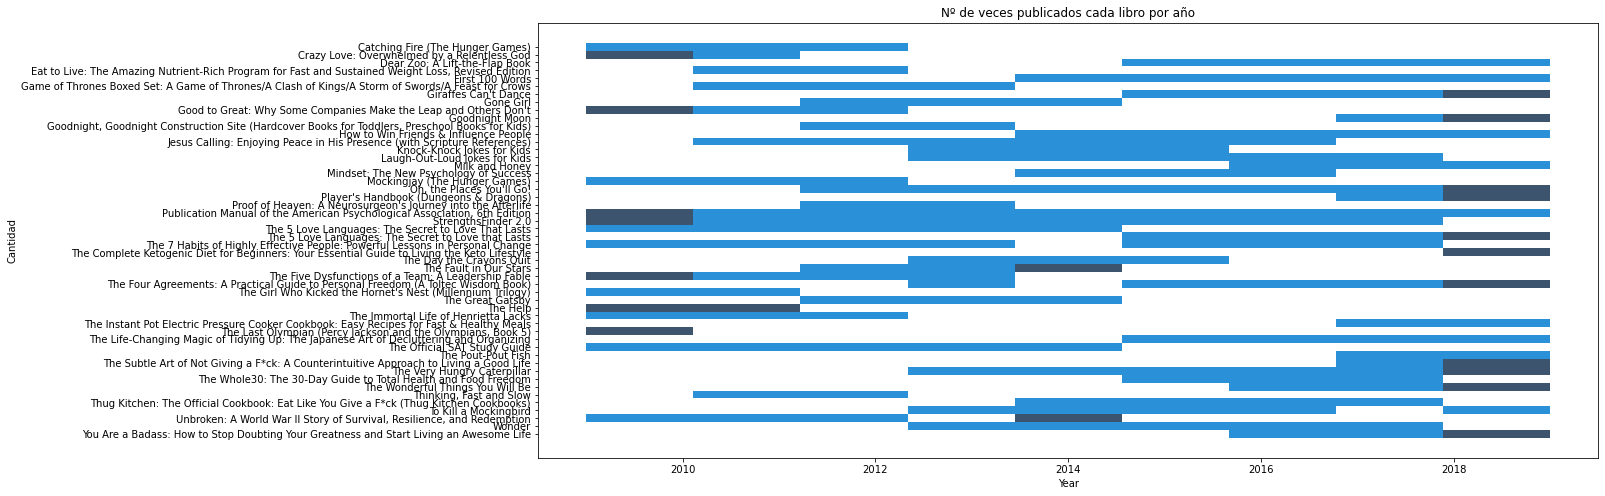

In [ ]:
plt.figure(figsize =(19, 8))
fig = sns.histplot(x= df_name["Year"], y=df_name["Name"], data= df_name)
fig.set(xlabel='Year', ylabel= 'Cantidad')
fig.set_title('Nº de veces publicados cada libro por año')
plt.show()

En la gráfica podemos comparar cuántos libros del género Non Fiction y Fiction se han publicado en diferentes años. Vemos grandes diferencias en los años 2015, 2016 y 2018.

- ¿Qué libros son más caros: los libros del género NF o los del F?

In [ ]:
df.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.70,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.60,2052,22,2011,Fiction


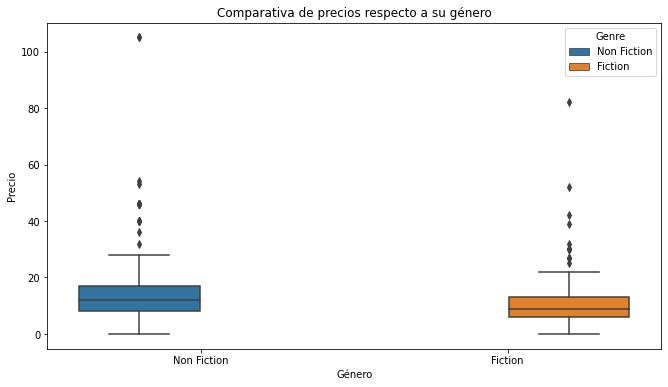

In [ ]:
# Boxplot por vertical, por isla
plt.figure(figsize =(11,6))
fig = sns.boxplot(x= 'Genre', y ='Price',hue= 'Genre', data = df)
fig.set(xlabel='Género', ylabel= 'Precio' )
fig.set_title('Comparativa de precios respecto a su género')
plt.show()

Podemos ver que los libros del género **Non Fiction** y **Fiction** no se diferencian en precio.